In [1]:
import pandas as pd
df = pd.read_csv('ESide Price Predicting v1 1-25-18.csv')

In [2]:
df.columns.values

array(['No.', 'MLSID', 'StreetNumberNumeric', 'streetaddress',
       'STREETNAME', 'PostalCode', 'StateOrProvince', 'City',
       'SalesClosePrice', 'LISTDATE', 'LISTPRICE', 'LISTTYPE',
       'OriginalListPrice', 'PricePerTSFT', 'FOUNDATIONSIZE', 'FENCE',
       'MapLetter', 'LotSizeDimensions', 'SchoolDistrictNumber',
       'DAYSONMARKET', 'offmarketdate', 'Fireplaces', 'RoomArea4',
       'roomtype', 'ROOF', 'RoomFloor4', 'PotentialShortSale',
       'PoolDescription', 'PDOM', 'GarageDescription', 'SQFTABOVEGROUND',
       'Taxes', 'RoomFloor1', 'RoomArea1', 'TAXWITHASSESSMENTS', 'TAXYEAR',
       'LivingArea', 'UNITNUMBER', 'YEARBUILT', 'ZONING', 'STYLE', 'ACRES',
       'CoolingDescription', 'APPLIANCES', 'backonmarketdate',
       'ROOMFAMILYCHAR', 'RoomArea3', 'EXTERIOR', 'RoomFloor3',
       'RoomFloor2', 'RoomArea2', 'DiningRoomDescription', 'BASEMENT',
       'BathsFull', 'BathsHalf', 'BATHQUARTER', 'BATHSTHREEQUARTER',
       'Class', 'BATHSTOTAL', 'BATHDESC', 'RoomArea5'

In [3]:
min_date = pd.to_datetime(df['LISTDATE']).min()
min_date

Timestamp('2017-02-23 00:00:00')

In [4]:
max_date = pd.to_datetime(df['offmarketdate']).max()
max_date

Timestamp('2018-01-24 00:00:00')

In [5]:
from datetime import date, timedelta

# this will give you a list containing all of the dates
dd = [min_date + timedelta(days=x) for x in range((max_date-min_date).days + 1)]

In [11]:
daily_listings = pd.DataFrame()
daily_listings['date'] = dd
daily_listings.set_index(['date'], inplace=True)
daily_listings['num_listings'] = 0

In [12]:
# TODO do we only have sold houses?
for day_index, day in daily_listings.iterrows():
    # loop through listings
    listing_count = 0
    for listing_index, listing_row in df.iterrows():
        
        min_date = pd.to_datetime(listing_row['LISTDATE'])
        max_date = pd.to_datetime(listing_row['offmarketdate'])
        
        # check to see if index of daily_listings is between the 'LISTDATE' and 'offmarketdate' of a house
        if (min_date <= day_index <= max_date):
            listing_count += 1
    daily_listings.loc[day_index, 'num_listings'] = listing_count

In [35]:
daily_listings['month_of_year'] = daily_listings.index.month

In [36]:
monthly_df = daily_listings.groupby(['month_of_year'])['num_listings'].mean().reset_index()

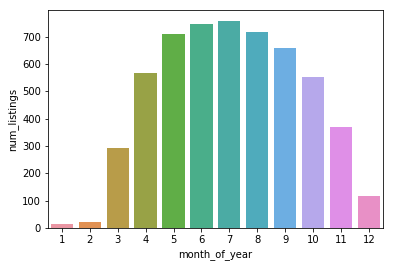

In [37]:
%matplotlib inline
import seaborn as sns;
ax = sns.barplot(x="month_of_year", y="num_listings", data=monthly_df)